# Libraries

In [31]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import pandas as pd
import math

# Experimental Datapoints

In [32]:
# Without rounding
# data_normal = [2.232600712345316,2.1864152915097295, 2.1182383634577295, 2.042668579241047, 2.0584779513462417]
# data_reverse = [2.233476272004981,2.1818614770236104, 2.1241432983380606, 2.048530599488611, 2.057145386158533]

#Rounding to three digits after decimal
data_normal = [2.233,2.186, 2.118, 2.043, 2.058]
data_reverse = [2.233,2.182, 2.124, 2.048, 2.057]

In [33]:
meas_fid_48 = 0.994 + 0.991 + 0.996 + 0.995 + 0.990
meas_fid_48

4.966

In [34]:
# theta = 48, p= 0, p=0.1 and p = 0.2
state_fid = [0.999,0.935,0.846]

In [35]:
Total_fid = []
for k in state_fid:
    Total_fid.append(k+meas_fid_48)
Total_fid 

[5.965, 5.901, 5.812]

#### 150

In [36]:
tot_fid_150 = 4.8205954629400445
tot_fid_150 = - 6 + tot_fid_150 + (0.9949 + 0.9949 + 0.9941 + 0.9955 + 0.9929 + 0.9946) # Tri ineq infidelity
Total_fid.append(tot_fid_150)
# Total_fid.append(tot_fid_150)
tot_fid_150

4.787495462940044

#### 22

In [37]:
tot_fid_22 = 4.667530121422457
tot_fid_22 = -6 + tot_fid_22 + (0.9970 + 0.9977 + 0.9967 + 1 + 0.9969 + 0.9944)
Total_fid.append(tot_fid_22)
# Total_fid.append(tot_fid_22)
tot_fid_22

4.650230121422457

In [40]:
Total_fid

[5.965, 5.901, 5.812, 4.787495462940044, 4.650230121422457]

# Plots

## Normal order

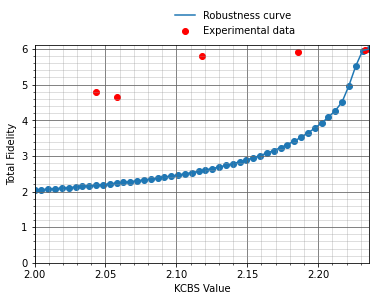

In [41]:
Fidata = pd.read_csv("Robustness_1.csv")
Fidata["KCBS Value"] = Fidata["KCBS Value"]*5 + 2.0
fig = plt.figure()

plt.scatter(Fidata["KCBS Value"],Fidata["Total Fidelity"])
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"],label='Robustness curve')
plt.scatter(data_normal,Total_fid,color = 'red',label='Experimental data')

plt.xlim(2,np.sqrt(5))
plt.ylim(0,6.1)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.xlabel('KCBS Value')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1.2),shadow=False, ncol=1,frameon=False)
plt.savefig('Robust_normal.pdf', bbox_inches='tight')

## Reverse order

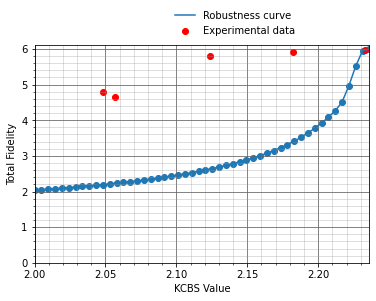

In [43]:
Fidata = pd.read_csv("Robustness_1.csv")
Fidata["KCBS Value"] = Fidata["KCBS Value"]*5 + 2.0
fig = plt.figure()

plt.scatter(Fidata["KCBS Value"],Fidata["Total Fidelity"])
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"],label='Robustness curve')

# Experimental points
plt.scatter(data_reverse,Total_fid,color = 'red',label='Experimental data')

plt.xlim(2,np.sqrt(5))
plt.ylim(0,6.1)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.xlabel('KCBS Value')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1.2),shadow=False, ncol=1,frameon=False)
plt.savefig('Robust_reverse.pdf', bbox_inches='tight')